LSTM is relatively easier than CNN to implement as we hardly need to care about the relationship among kernel size, strides, input size and output size. Just make sure the dimension of input and output is defined correctly in the network.

In [1]:
import pandas as pd
import numpy as numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Reshape
from keras.layers import Conv1D, MaxPooling1D
from keras.utils import np_utils
from keras.layers import LSTM, LeakyReLU
from keras.callbacks import CSVLogger, ModelCheckpoint
import h5py
import os
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
from tensorflow.compat.v1 import ConfigProto, Session
from tensorflow.python.client import device_lib


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

config = ConfigProto()
config.gpu_options.allow_growth = True
set_session(Session(config=config))

with h5py.File(''.join(['ethereum2016to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]

# Set Hyperparameters
step_size = datas.shape[1]
units= 512
second_units = 256
batch_size = 256
nb_features = datas.shape[2]
epochs = 100
output_size=16
output_file_name='ethereum2016to2021_close_LSTM_1_tanh_leaky_'

# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:]
validation_labels = labels[training_size:,:,0]

# Build model
model = Sequential()
model.add(LSTM(units=units,activation='tanh', input_shape=(step_size,nb_features),return_sequences=False))
model.add(Dropout(0.6))
model.add(Dense(output_size))
model.add(LeakyReLU())
model.compile(loss='mse', optimizer='adam')
model.fit(training_datas, training_labels, batch_size=batch_size, validation_data=(validation_datas,validation_labels), epochs = epochs, callbacks=[CSVLogger(output_file_name+'.csv', append=True),ModelCheckpoint('weights_LSTM/'+output_file_name+'-{epoch:02d}-{val_loss:.5f}.hdf5', monitor='val_loss', verbose=1,mode='min')])

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.0134
Epoch 00001: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-01-0.09316.hdf5
7/7 [==============================] - 2s 356ms/step - loss: 0.0134 - val_loss: 0.0932
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.0081
Epoch 00002: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-02-0.01847.hdf5
7/7 [==============================] - 2s 282ms/step - loss: 0.0081 - val_loss: 0.0185
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.0042
Epoch 00003: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-03-0.02352.hdf5
7/7 [==============================] - 2s 279ms/step - loss: 0.0042 - val_loss: 0.0235
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.0019
Epoch 00004: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-04-0.00446.hdf5
7/7 [==============================

Epoch 31/100
7/7 [==============================] - ETA: 0s - loss: 2.4780e-04
Epoch 00031: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-31-0.00003.hdf5
7/7 [==============================] - 2s 278ms/step - loss: 2.4780e-04 - val_loss: 3.4844e-05
Epoch 32/100
7/7 [==============================] - ETA: 0s - loss: 2.3777e-04
Epoch 00032: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-32-0.00022.hdf5
7/7 [==============================] - 2s 280ms/step - loss: 2.3777e-04 - val_loss: 2.2374e-04
Epoch 33/100
7/7 [==============================] - ETA: 0s - loss: 2.4971e-04
Epoch 00033: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-33-0.00033.hdf5
7/7 [==============================] - 2s 278ms/step - loss: 2.4971e-04 - val_loss: 3.2773e-04
Epoch 34/100
7/7 [==============================] - ETA: 0s - loss: 2.6277e-04
Epoch 00034: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-34-0.00

Epoch 61/100
7/7 [==============================] - ETA: 0s - loss: 1.6749e-04
Epoch 00061: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-61-0.00005.hdf5
7/7 [==============================] - 2s 277ms/step - loss: 1.6749e-04 - val_loss: 5.2486e-05
Epoch 62/100
7/7 [==============================] - ETA: 0s - loss: 1.4503e-04
Epoch 00062: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-62-0.00003.hdf5
7/7 [==============================] - 2s 276ms/step - loss: 1.4503e-04 - val_loss: 2.5409e-05
Epoch 63/100
7/7 [==============================] - ETA: 0s - loss: 1.6059e-04
Epoch 00063: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-63-0.00005.hdf5
7/7 [==============================] - 2s 275ms/step - loss: 1.6059e-04 - val_loss: 4.8731e-05
Epoch 64/100
7/7 [==============================] - ETA: 0s - loss: 1.5866e-04
Epoch 00064: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-64-0.00

Epoch 91/100
7/7 [==============================] - ETA: 0s - loss: 1.3018e-04
Epoch 00091: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-91-0.00015.hdf5
7/7 [==============================] - 2s 277ms/step - loss: 1.3018e-04 - val_loss: 1.5496e-04
Epoch 92/100
7/7 [==============================] - ETA: 0s - loss: 1.3030e-04
Epoch 00092: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-92-0.00011.hdf5
7/7 [==============================] - 2s 276ms/step - loss: 1.3030e-04 - val_loss: 1.0598e-04
Epoch 93/100
7/7 [==============================] - ETA: 0s - loss: 1.3595e-04
Epoch 00093: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-93-0.00021.hdf5
7/7 [==============================] - 2s 279ms/step - loss: 1.3595e-04 - val_loss: 2.1269e-04
Epoch 94/100
7/7 [==============================] - ETA: 0s - loss: 1.1210e-04
Epoch 00094: saving model to weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-94-0.00

# Result Plotting

In [2]:
### from keras import applications
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.callbacks import CSVLogger
import tensorflow as tf
from imageio import imread
import numpy as np
import random
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D, LeakyReLU
from keras import backend as K
import keras
from keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.compat.v1.keras.backend import set_session
from keras import optimizers
import h5py
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
from tensorflow.compat.v1 import ConfigProto, Session
# import matplotlib
import matplotlib.pyplot as plt


# Configure GPU
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

with h5py.File(''.join(['ethereum2016to2021_close.h5']), 'r') as hf:
    datas = hf['inputs'][()]
    labels = hf['outputs'][()]
    input_times = hf['input_times'][()]
    output_times = hf['output_times'][()]
    original_inputs = hf['original_inputs'][()]
    original_outputs = hf['original_outputs'][()]
    original_datas = hf['original_datas'][()]

config = ConfigProto()
config.gpu_options.allow_growth = True
set_session(Session(config=config))

scaler=MinMaxScaler()
# Split training validation
training_size = int(0.8 * datas.shape[0])
training_datas = datas[:training_size,:,:]
training_labels = labels[:training_size,:,0]
validation_datas = datas[training_size:,:,:]
validation_labels = labels[training_size:,:,0]
validation_original_outputs = original_outputs[training_size:,:,:]
validation_original_inputs = original_inputs[training_size:,:,:]
validation_input_times = input_times[training_size:,:,:]
validation_output_times = output_times[training_size:,:,:]

ground_true = np.append(validation_original_inputs,validation_original_outputs, axis=1)
ground_true.shape

ground_true_times = np.append(validation_input_times,validation_output_times, axis=1)
ground_true_times.shape

# Set Hyperparameters
step_size = datas.shape[1]
batch_size = 256
nb_features = datas.shape[2]
epochs = 1
output_size = 16
units = 512
second_units = 256

model = Sequential()
model.add(LSTM(units=units,activation='tanh', input_shape=(step_size,nb_features),return_sequences=False))
#model.add(LSTM(units=second_units,activation='relu',return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_size))
model.add(LeakyReLU())
model.load_weights('weights_LSTM/ethereum2016to2021_close_LSTM_1_tanh_leaky_-98-0.00003.hdf5')
model.compile(loss='mse', optimizer='adam')

original_datas.shape

predicted = model.predict(validation_datas)
predicted_inverted = []

# we only care about the 0 axis, close price data

scaler.fit(original_datas[:,0].reshape(-1,1))
predicted_inverted.append(scaler.inverse_transform(predicted))
print(np.array(predicted_inverted).shape)
# Get only the close data
ground_true = ground_true[:,:,0].reshape(-1)
ground_true_times = ground_true_times.reshape(-1)
ground_true_times = pd.to_datetime(ground_true_times, unit='s')
# Since we are appending in the first dimension
predicted_inverted = np.array(predicted_inverted)[0,:,:].reshape(-1)
print(np.array(predicted_inverted).shape)
validation_output_times = pd.to_datetime(validation_output_times.reshape(-1), unit='s')

(1, 395, 16)
(6320,)


In [3]:
ground_true_df = pd.DataFrame()
ground_true_df['times'] = ground_true_times
ground_true_df['value'] = ground_true
ground_true_df.set_index('times').reset_index()
ground_true_df.shape

(107440, 2)

In [4]:
prediction_df = pd.DataFrame()
prediction_df['times'] = validation_output_times
prediction_df['value'] = predicted_inverted
prediction_df.shape

(6320, 2)

In [5]:
prediction_df.head()

,times,value
0,2020-04-04 16:55:00,145.815186
1,2020-04-04 17:00:00,144.154800
2,2020-04-04 17:05:00,144.976212
3,2020-04-04 17:10:00,146.525742
4,2020-04-04 17:15:00,147.236633


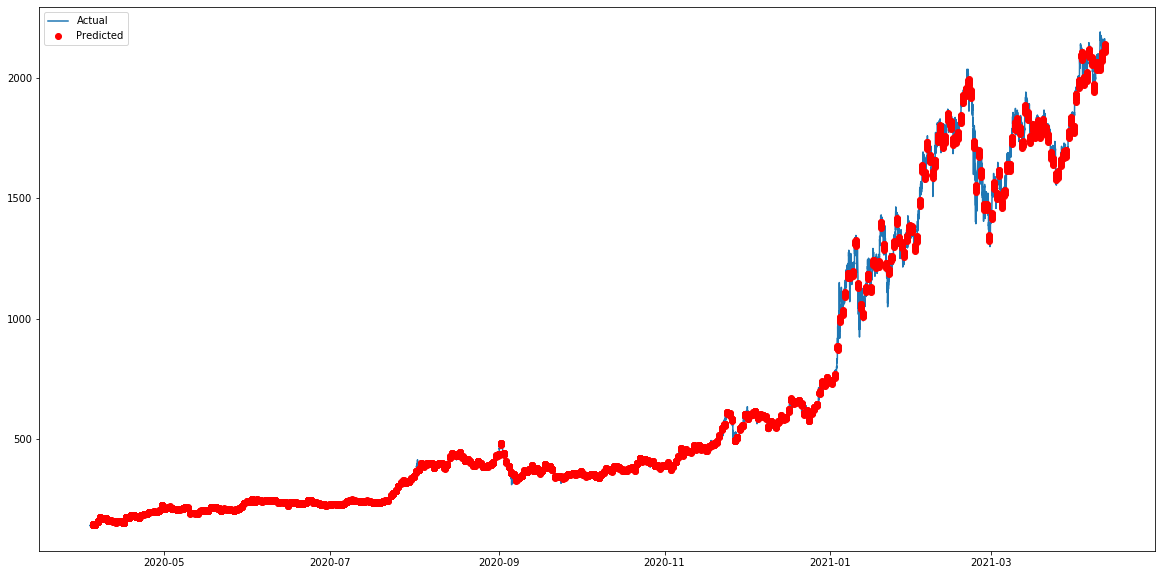

In [6]:
prediction_df_load = prediction_df.loc[(prediction_df["times"].dt.year >= 2020)&(prediction_df["times"].dt.month >= 1),:]
# 
ground_true_df_load = ground_true_df.loc[(ground_true_df["times"].dt.year >= 2020)&(ground_true_df["times"].dt.month >= 1),:]
# 

plt.figure(figsize=(20,10))
plt.plot(ground_true_df_load.times,ground_true_df_load.value, label = 'Actual')
# plt.plot(prediction_df.times,prediction_df.value, label = 'Predicted')
plt.plot(prediction_df_load.times,prediction_df_load.value,'ro', label='Predicted')
plt.legend(loc='upper left')
plt.savefig('result/ethereum2016to2021_close_LSTM_1_tanh_leaky_result.png')
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error
mean_squared_error(validation_original_outputs[:,:,0].reshape(-1),predicted_inverted)

138.77594910800892